# Importing required libraries 

In [35]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Loading and reading dataset

In [2]:
df = pd.read_csv("NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


# Data cleaning

In [4]:
# Checking null values 
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
# Checking duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


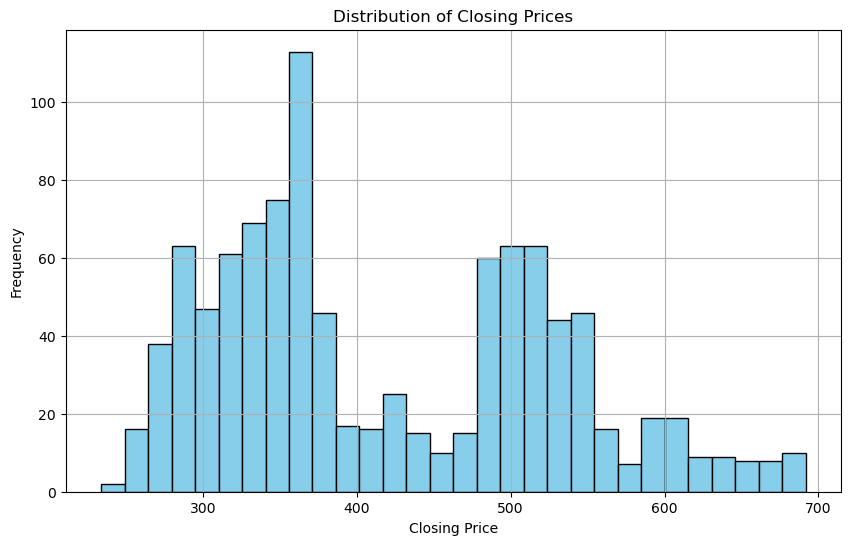

In [8]:
# Adding a histogram to visualize the distribution of closing prices
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.grid(True)
plt.show()

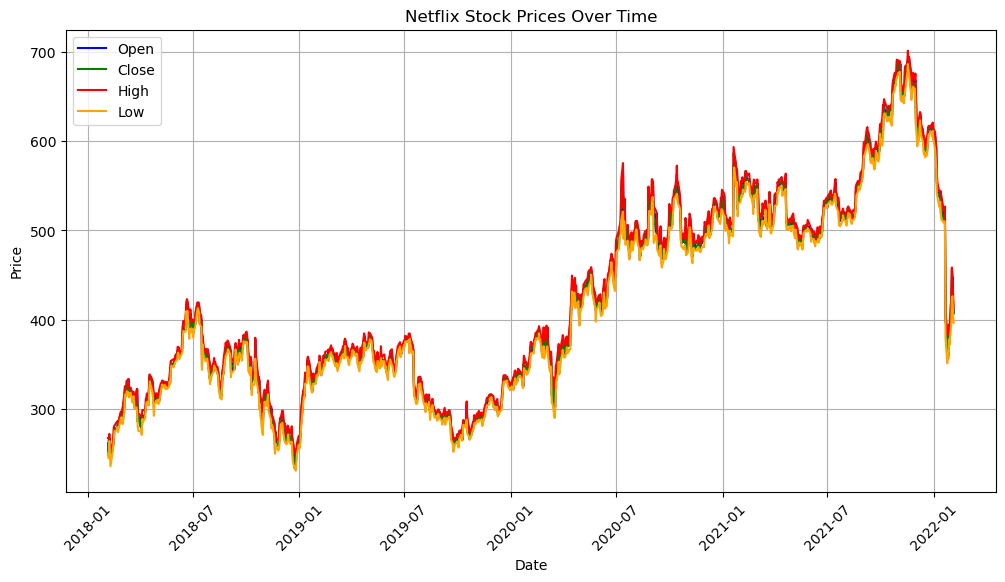

In [9]:
# Netflix stock proces over time 

# Convertiing dates to pandas datetime
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], color='blue', label='Open')
plt.plot(df['Date'], df['Close'], color='green', label='Close')
plt.plot(df['Date'], df['High'], color='red', label='High')
plt.plot(df['Date'], df['Low'], color='orange', label='Low')
plt.title('Netflix Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


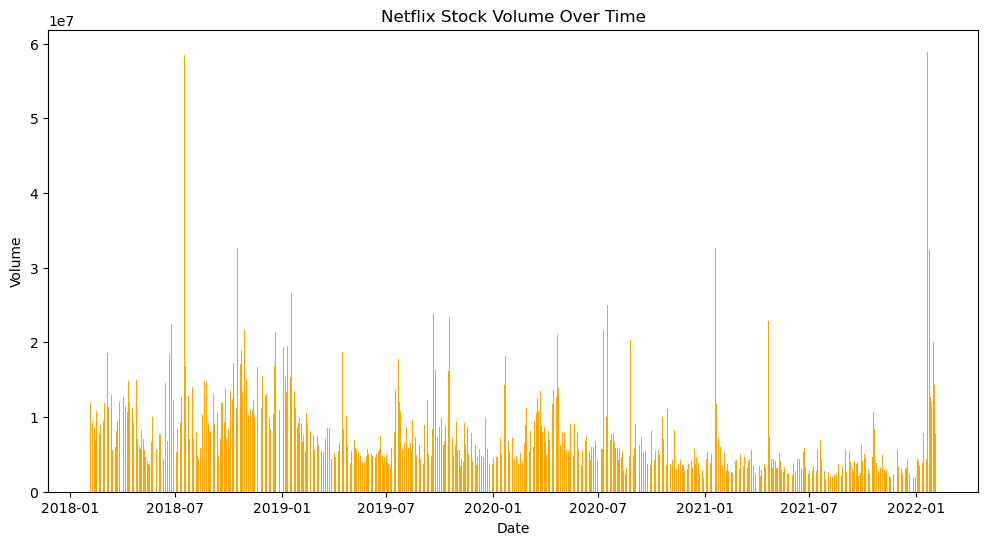

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Netflix Stock Volume Over Time')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7712\1079340379.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


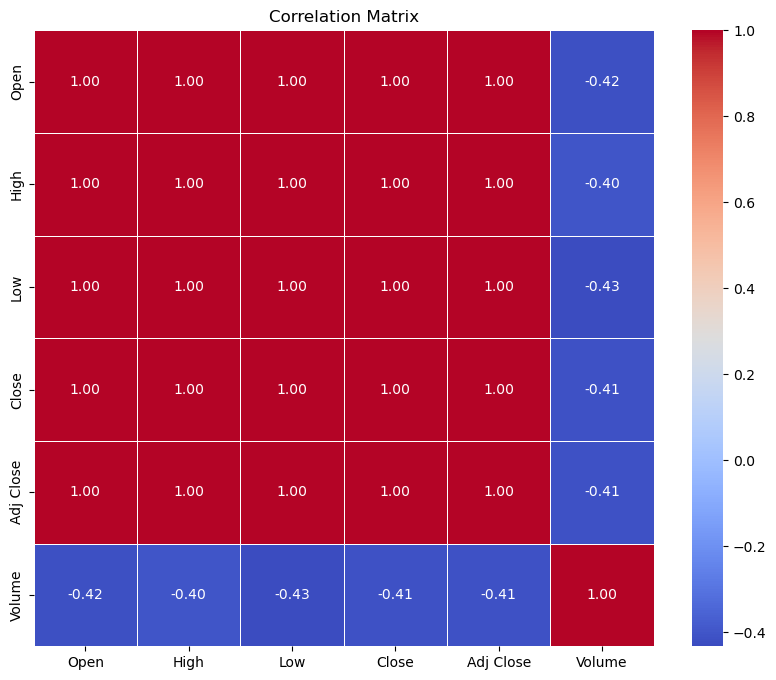

In [11]:
# correlation matrix

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



# Data preprocessing

In [12]:
# Converting 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# Sorting DataFrame by date
df.sort_values(by='Date', inplace=True)

# Data splitting

In [14]:
# Splitting the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Linear regression model 

In [15]:
# Implementing a linear regression model
# Feature selection
X_train_lr = train_data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y_train_lr = train_data['Close']
X_test_lr = test_data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y_test_lr = test_data['Close']

In [16]:
# Initialize and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

LinearRegression()

In [17]:
# Predicting on the test set
predictions_lr = lr_model.predict(X_test_lr)

# Evaluating the model
mse_lr = mean_squared_error(y_test_lr, predictions_lr)
print('Linear Regression Mean Squared Error:', mse_lr)

Linear Regression Mean Squared Error: 1.8465521103904114e-24


# Random forest model 

In [18]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_lr, y_train_lr)


RandomForestRegressor(random_state=42)

In [19]:
# Predict on the test set
predictions_rf = rf_model.predict(X_test_lr)


In [20]:
# Evaluate the model using mean squared error
mse_rf = mean_squared_error(y_test_lr, predictions_rf)
print('Random Forest Regression Mean Squared Error:', mse_rf)


Random Forest Regression Mean Squared Error: 1521.8194068136936


# SVM model

In [23]:
# Feature scaling
scaler = MinMaxScaler()
X_train_svm = scaler.fit_transform(X_train_lr)
X_test_svm = scaler.transform(X_test_lr)

In [25]:
# Initialize and fit the SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_svm, y_train_lr)

SVR(kernel='linear')

In [27]:
# Predicting on the test set
predictions_svm = svm_model.predict(X_test_svm)

# Evaluating the model
mse_svm = mean_squared_error(y_test_lr, predictions_svm)
print('Support Vector Machine Mean Squared Error:', mse_svm)

Support Vector Machine Mean Squared Error: 55.44903340960616


# Model comparison 

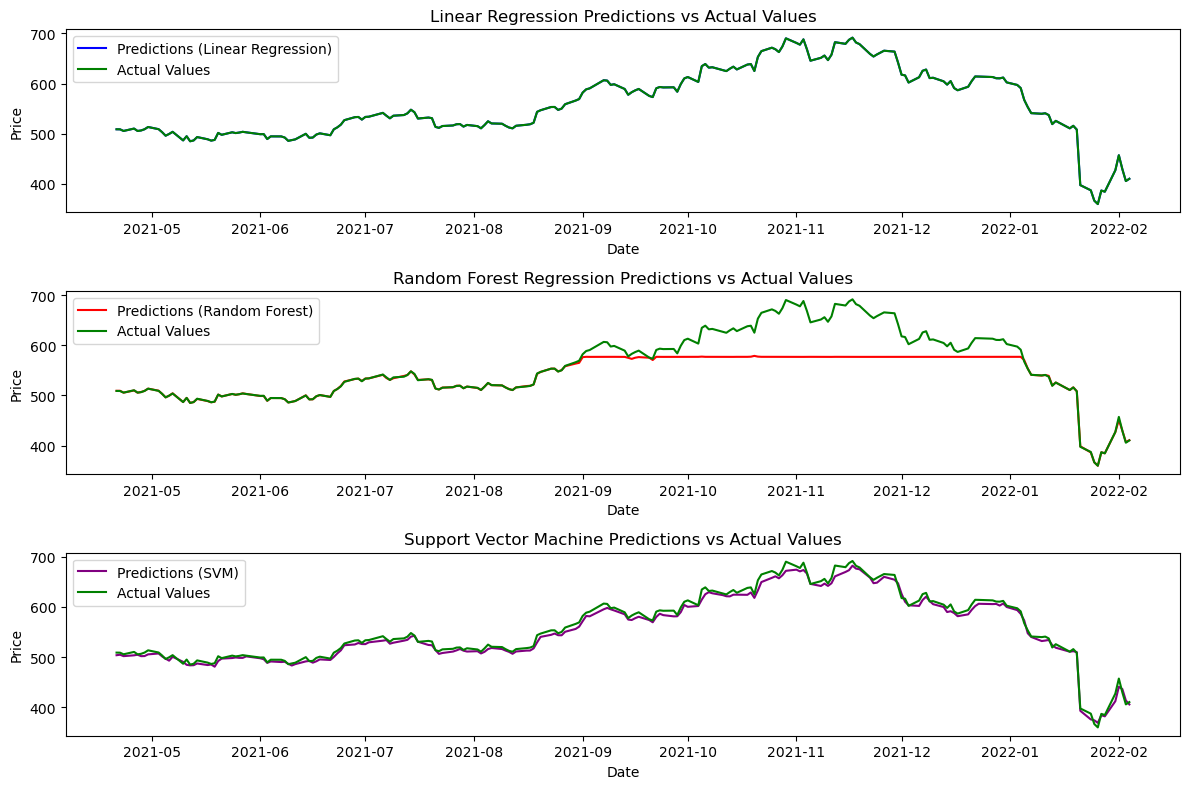

In [30]:
# Visualizing the predictions of the three models
plt.figure(figsize=(12, 8))

# Plotting Linear Regression predictions
plt.subplot(3, 1, 1)
plt.plot(test_data['Date'], predictions_lr, label='Predictions (Linear Regression)', color='blue')
plt.plot(test_data['Date'], y_test_lr, label='Actual Values', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Predictions vs Actual Values')
plt.legend()

# Plotting Random Forest Regression predictions
plt.subplot(3, 1, 2)
plt.plot(test_data['Date'], predictions_rf, label='Predictions (Random Forest)', color='red')
plt.plot(test_data['Date'], y_test_lr, label='Actual Values', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Random Forest Regression Predictions vs Actual Values')
plt.legend()

# Plotting SVM predictions
plt.subplot(3, 1, 3)
plt.plot(test_data['Date'], predictions_svm, label='Predictions (SVM)', color='purple')
plt.plot(test_data['Date'], y_test_lr, label='Actual Values', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Machine Predictions vs Actual Values')
plt.legend()

plt.tight_layout()
plt.show()


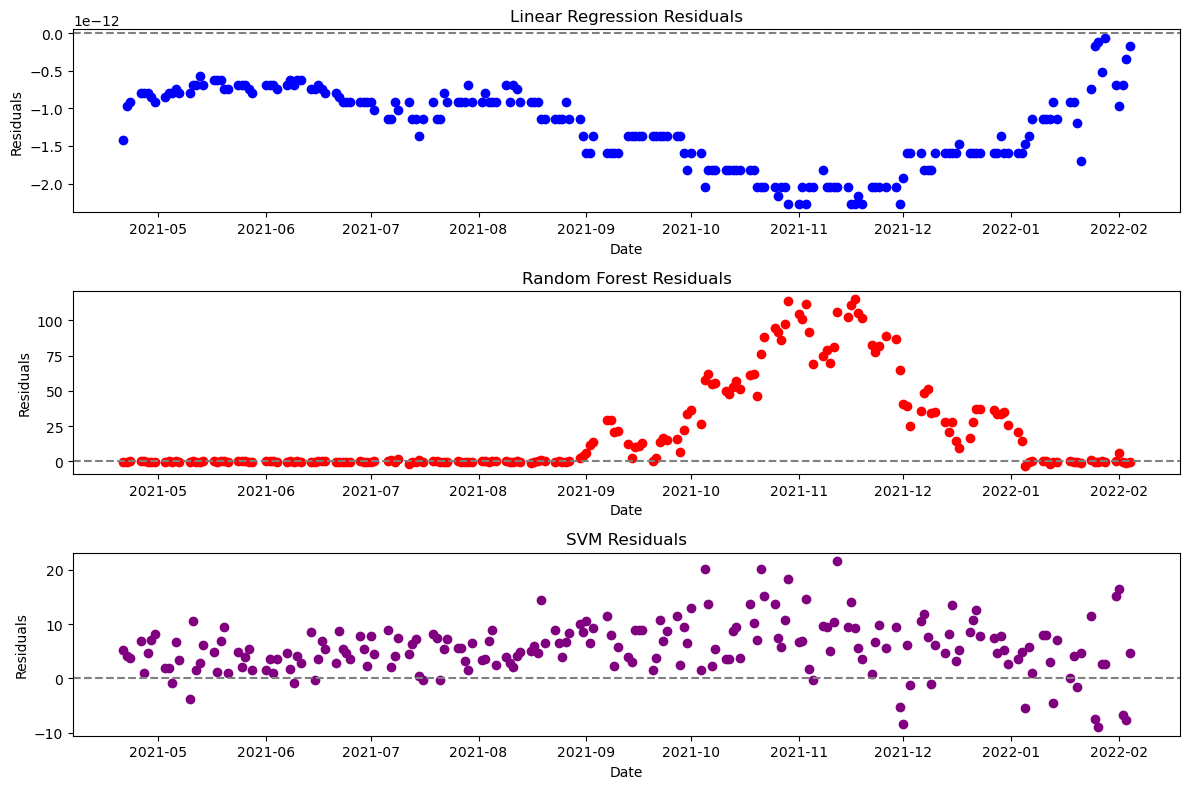

In [31]:
# Calculate residuals
residuals_lr = y_test_lr - predictions_lr
residuals_rf = y_test_lr - predictions_rf
residuals_svm = y_test_lr - predictions_svm

plt.figure(figsize=(12, 8))

# Residuals for Linear Regression
plt.subplot(3, 1, 1)
plt.scatter(test_data['Date'], residuals_lr, color='blue')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

# Residuals for Random Forest Regression
plt.subplot(3, 1, 2)
plt.scatter(test_data['Date'], residuals_rf, color='red')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Random Forest Residuals')

# Residuals for SVM
plt.subplot(3, 1, 3)
plt.scatter(test_data['Date'], residuals_svm, color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('SVM Residuals')

plt.tight_layout()
plt.show()


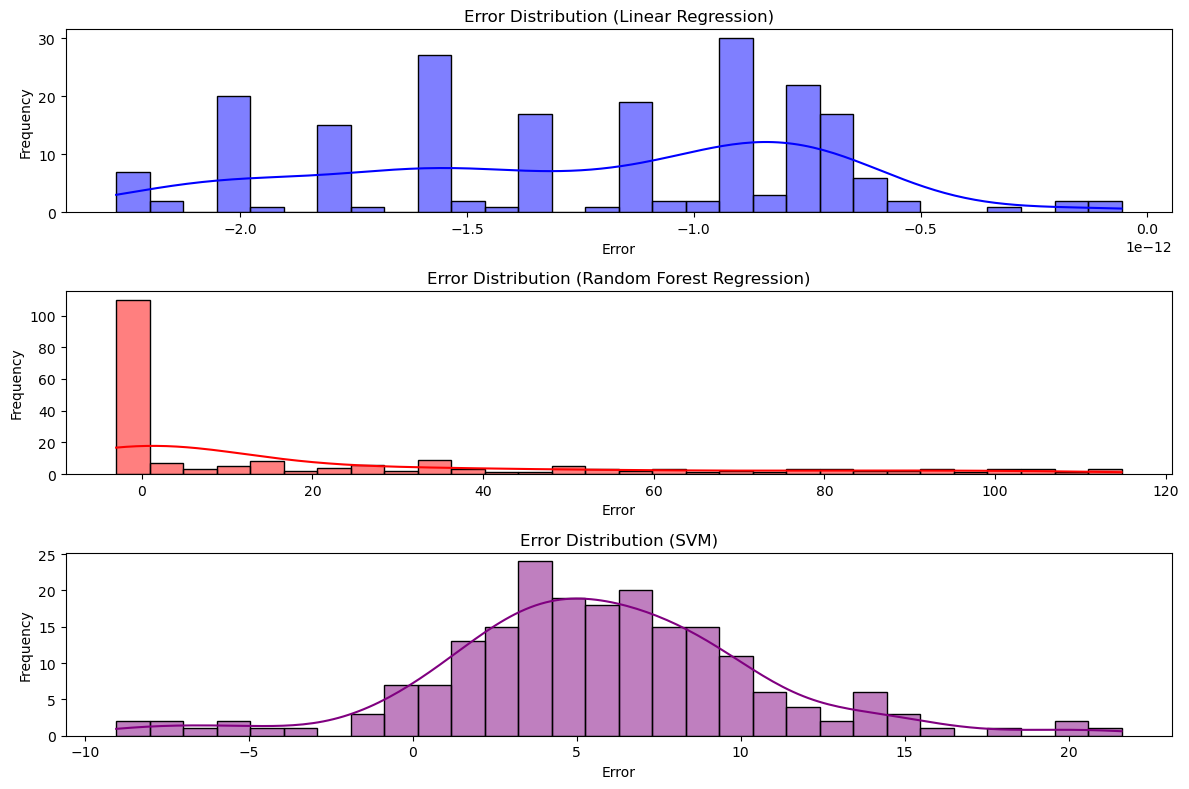

In [32]:
# Calculate errors
errors_lr = y_test_lr - predictions_lr
errors_rf = y_test_lr - predictions_rf
errors_svm = y_test_lr - predictions_svm

plt.figure(figsize=(12, 8))

# Distribution of errors for Linear Regression
plt.subplot(3, 1, 1)
sns.histplot(errors_lr, bins=30, color='blue', kde=True)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (Linear Regression)')

# Distribution of errors for Random Forest Regression
plt.subplot(3, 1, 2)
sns.histplot(errors_rf, bins=30, color='red', kde=True)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (Random Forest Regression)')

# Distribution of errors for SVM
plt.subplot(3, 1, 3)
sns.histplot(errors_svm, bins=30, color='purple', kde=True)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (SVM)')

plt.tight_layout()
plt.show()


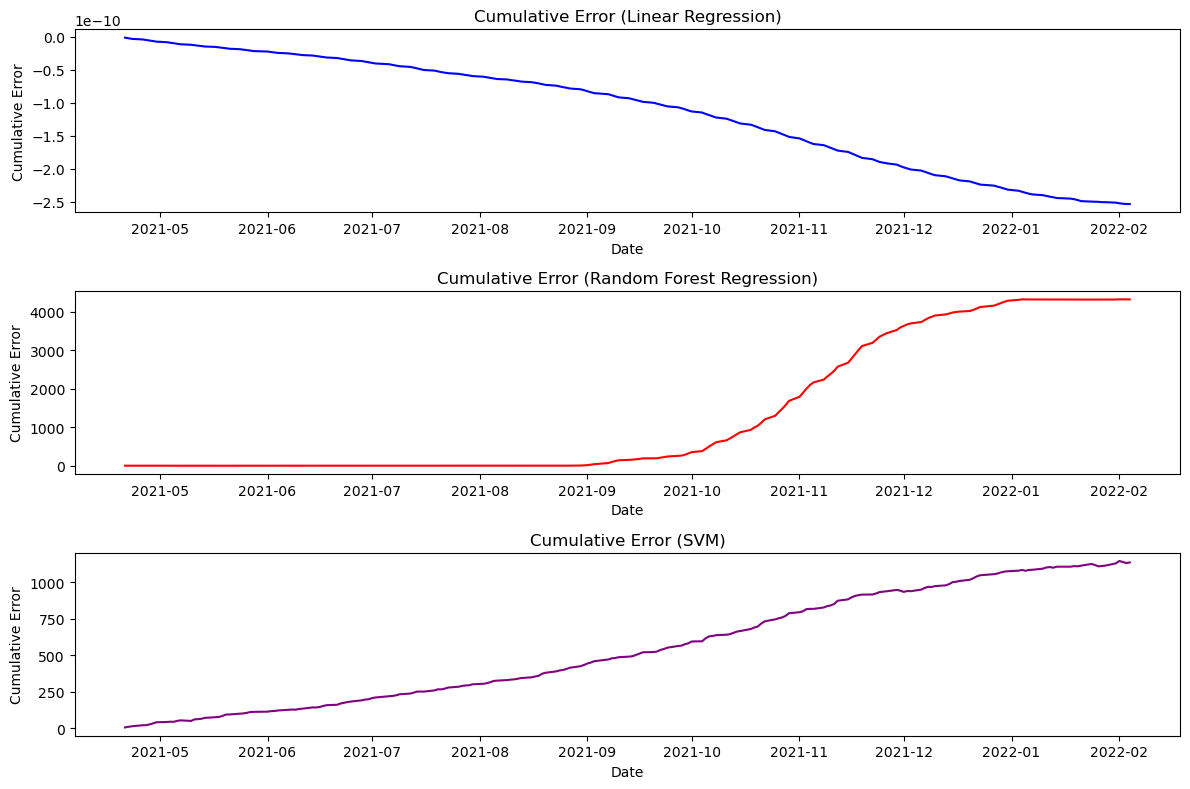

In [33]:
# Calculate cumulative errors
cumulative_error_lr = np.cumsum(errors_lr)
cumulative_error_rf = np.cumsum(errors_rf)
cumulative_error_svm = np.cumsum(errors_svm)

plt.figure(figsize=(12, 8))

# Cumulative error for Linear Regression
plt.subplot(3, 1, 1)
plt.plot(test_data['Date'], cumulative_error_lr, color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Error')
plt.title('Cumulative Error (Linear Regression)')

# Cumulative error for Random Forest Regression
plt.subplot(3, 1, 2)
plt.plot(test_data['Date'], cumulative_error_rf, color='red')
plt.xlabel('Date')
plt.ylabel('Cumulative Error')
plt.title('Cumulative Error (Random Forest Regression)')

# Cumulative error for SVM
plt.subplot(3, 1, 3)
plt.plot(test_data['Date'], cumulative_error_svm, color='purple')
plt.xlabel('Date')
plt.ylabel('Cumulative Error')
plt.title('Cumulative Error (SVM)')

plt.tight_layout()
plt.show()
